## n-Armed Bandits

This sample introduces the n-armed bandit problem, the conflict between exploration and exploitation, and several ways how to balance this conflict.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym

### The Problem defintion:
A typical slot machine is a device in which the player pulls a lever arm and receives rewards at some expected rate. Because the expected rate is typically negative, these machines are sometimes referred to as “one-armed bandits”. By analogy, a “multi-armed bandit” is a machine in which there are multiple lever arms to pull, each one of which may pay out at a different expected rate (= reward). 

The “multi-armed bandit” problem refers to the challenge of constructing a strategy for pulling the levers when one has no prior knowledge of the payout rate for any of the levers. Therefore, one must strike a balance between exploring each of the levers in order to determine their value, while exploiting one’s current knowledge in order to favor high paying levers.

### The Bandit Class
Let's define the bandit:

In [ ]:
class Bandit:
    def __init__(self, k):
        # k: number of bandit arms
        self.k = k
        
        # qstar: action values
        self.qstar = np.random.normal(size=k).round(2)
    
    def pull(self, a):
        return np.random.normal(loc=self.qstar[a]) # returns reward of slot machine
    
    def __str__(self):
        return np.array_str(self.qstar)


The greed action selection algorithm

In [ ]:
def greedy_action_selection(k, numsteps):
    # k: number of bandit arms
    # numsteps: number of steps (repeated action selections)
    
    # Apossible[t]: list of possible actions at step t
    Apossible = {}
    
    # A[t]: action selected at step t
    A = np.zeros((numsteps,))
    
    # N[a,t]: the number of times action a was selected 
    #         in steps 0 through t-1
    N = np.zeros((k,numsteps+1))
    
    # R[t]: reward at step t
    R = np.zeros((numsteps,))
    
    # Q[a,t]: estimated value of action a at step t
    Q = np.zeros((k,(numsteps+1)))

    # Initialize bandit
    bandit = Bandit(k)

    for t in range(numsteps):

        # Select greedy actions as possible actions
        Apossible[t] = np.argwhere(Q[:,t] == np.amax(Q[:,t])).flatten()

        # Select action randomly from possible actions
        a = Apossible[t][np.random.randint(len(Apossible[t]))]

        # Record action taken
        A[t] = a

        # Perform action (= sample reward)
        R[t] = bandit.pull(a)

        # Update action counts
        N[:,t+1] = N[:,t]
        N[a,t+1] += 1

        # Update action value estimates, incrementally
        if N[a,t] > 0:
            Q[:,t+1] = Q[:,t]
            Q[a,t+1] = Q[a,t] + (R[t] - Q[a,t]) / N[a,t]
        else:
            Q[:,t+1] = Q[:,t]
            Q[a,t+1] = R[t]

        #Q[:,t] = np.around(Q:t], decimals=2)
    return {'bandit': bandit, 
            'Apossible': Apossible, 
            'A': A, 'N' : N, 'R' : R, 'Q' : Q}
    
def epsilon_greedy_action_selection(k, numsteps, epsilon=0.0):
    bandit = Bandit(k)
    profit = np.zeros(k)
    avg = np.zeros(numsteps)
    for step in range(numsteps):
        aPossible = []
        for i in range(k): 
            if profit[i] == np.max(profit): aPossible.append(i)
        rng = np.random.random()
        if rng > epsilon:
            y = np.random.randint(len(aPossible))
            profit[aPossible[y]] += bandit.pull(y)
            #print(f"positions with max value: {aPossible}, chosen: {aPossible[y]}\n{profit}\n")
        else: 
            y = np.random.randint(k)
            profit[y] += bandit.pull(y)
            #print("!random guess!")
            #print(f"positions with max value: {aPossible}, chosen: {y}\n{profit}\n")
        avg[step] = np.average(profit)
    return profit, avg

p, a = epsilon_greedy_action_selection(5,5,0.1)
print(p, a)

[ 4.02179387 -0.35414454 -1.88088394 -1.74521905 -0.55988483] [-0.34904381 -0.7252206  -0.79604951 -0.90802647 -0.1036677 ]


### Single run

In [ ]:
k = 10
numsteps = 5

def printResult(bandit_task):
    print('Bandit Q: %s' % bandit_task['bandit'])
    print('Action A: %s' % bandit_task['A'])
    print('Reward R: %s' % bandit_task['R'])
    print('Est    Q:')
    print('%s' % bandit_task['Q'])
    print("\n")
    
bandit_task = greedy_action_selection(k, numsteps)
printResult(bandit_task)

Bandit Q: [ 1.13  0.18 -0.19  1.39 -0.23  0.01 -0.92  0.5  -1.03 -0.41]
Action A: [3. 3. 3. 3. 3.]
Reward R: [2.58506482 1.50693349 0.58971381 0.21865295 0.11441228]
Est    Q:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         2.58506482 1.50693349 1.04832365 0.77176675 0.60742813]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]




### Conversation over 500 plays

(-5.0, 523.95)

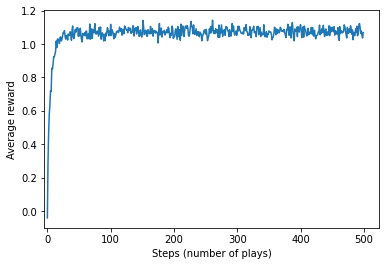

In [ ]:
k = 10
numsteps = 500
numIterations = 2000

avgR = np.zeros((numsteps, ))
for task in range(numIterations):
    bandit_task = greedy_action_selection(k,numsteps)
    avgR += bandit_task['R']
avgR /= numIterations

plt.plot(avgR)
plt.ylabel('Average reward')
plt.xlabel('Steps (number of plays)')
plt.xlim(-5)

0
1
2
3
4
5
6
7
8
9


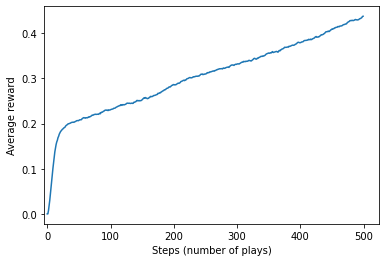

In [ ]:
k = 10
numsteps = 500
numIterations = 2000
avgProfit = np.zeros(numsteps)
for epsilon in range(10):
    for iter in range(numIterations):
        reward, average = epsilon_greedy_action_selection(k, numsteps, epsilon/100)
        avgProfit += average
    print(epsilon)

avgProfit /= numIterations*10
plt.plot(avgProfit)
plt.ylabel('Average reward')
plt.xlabel('Steps (number of plays)')
plt.xlim(-5)
None

In [482]:
def random_policy(env=None, k=1):
    totalStepsTaken = 0
    totalWins = 0
    winningSteps = 0
    for i in range(k):
        c = env.reset()
        done = False
        stepsTaken = 0
        while(not done):
            c, reward, done, info, prob = env.step(env.action_space.sample())
            stepsTaken += 1
            totalStepsTaken += 1
        if reward == 1:
            totalWins += 1
            winningSteps += stepsTaken
        env.close()
    print(f"avg steps until 'done': {totalStepsTaken/k}, avg steps until win: {winningSteps/totalWins}\ntotalWins: {totalWins}/{k} ({100*totalWins/k:.2f}%)")
    
env = gym.make("FrozenLake8x8-v1")
random_policy(env, 1000000)

avg steps until 'done': 32.092311, avg steps until win: 59.643070787637086
totalWins: 2006/1000000 (0.20%)
